In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
print(df.shape)
df.head()

(15, 2)


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [5]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [6]:
IQR = df['Ground Temperature'].quantile(0.75) - df['Ground Temperature'].quantile(0.25)
upper_threshold = df['Ground Temperature'].quantile(0.75) + (1.5*IQR)
lower_threshold = df['Ground Temperature'].quantile(0.25) - (1.5*IQR)
if upper_threshold > df['Ground Temperature'].max():
  print("No outliers in upper threshold range")
else :
  print("outliers in upper threshold range")
if lower_threshold < df['Ground Temperature'].min() :
  print("No outliers in lower threshold range")
else :
  print("Outliers in lower threshold range")

No outliers in upper threshold range
No outliers in lower threshold range


### EDA

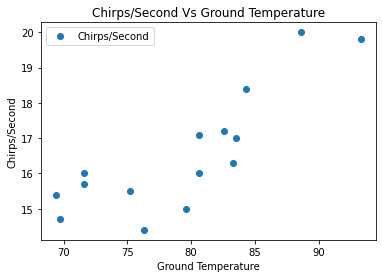

In [7]:
df.plot(y='Chirps/Second',x='Ground Temperature',style ="o")
plt.ylabel('Chirps/Second')
plt.xlabel('Ground Temperature')
plt.title('Chirps/Second Vs Ground Temperature')
plt.show()

In [8]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


Correlation is high and therefore there is a strong linear relationship between Chirps/Second and Ground Temperature

### Preparing data for the model

In [9]:
X = df[['Ground Temperature']].values  #Feature variable
y = df['Chirps/Second'].values         #Target variable

In [10]:
#Split the data into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [11]:
X_train.shape, X_test.shape

((10, 1), (5, 1))

In [12]:
y_train.shape,y_test.shape

((10,), (5,))

### Model

In [13]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # Predicted chirps/second = m * Temperature + c  
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

### 1. Find the linear regression equation for this data.

y = mX+c

In [14]:
c = regressor.intercept_ # c value
print(c)

1.126295048640138


In [15]:
m = regressor.coef_ # m value
print(m)

[0.19643263]


In [16]:
print('Linear Regression Equation: y = {:.3f} * x + {:.3f}'.format(m[0], c))

Linear Regression Equation: y = 0.196 * x + 1.126


### 2. Chart the original data and the equation on the chart.

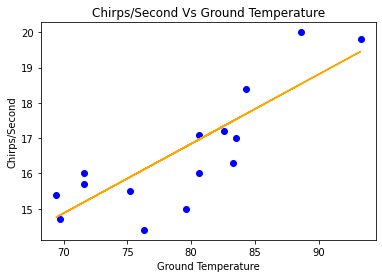

In [17]:
plt.ylabel('Chirps/Second')
plt.xlabel('Ground Temperature')
plt.title('Chirps/Second Vs Ground Temperature')

plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='orange')
plt.show()

### 3. Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [18]:
y_predict = regressor.predict(X_test)  # given the features of the test dataset, it will give the final predictions
df_prediction = pd.DataFrame({'Actual':y_test,'Predicted': y_predict})
df_prediction

,Actual,Predicted
0,17.0,17.528420
1,16.0,16.958765
2,15.0,16.762332
3,18.4,17.685566
4,19.8,19.453459


In [19]:
from sklearn.metrics import r2_score as r
r(y_test,y_predict)

0.659951765936371

R² Score is 0.65 which is lesser than 0.8. Therefore the equation is not good fit for this model. There is low number of data ponts avialable for training and testing. If we have more data the model might perform better

### 4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?


In [20]:
regressor.predict([[95]])

array([19.78739494])

At 95ºF the crickets would be chirping at an approximate rate of 19.78 chirps/second

### 5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [21]:
(18-c)/m    # y = mX+c 

array([85.90072289])

When the crickets were chirping at a rate of 18 chirps/second, the approximate ground temperature was 85.9ºF

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [2]:
df = pd.read_fwf("brain_body.txt")
print(df.shape)
df.head()

(62, 2)


,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [3]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [4]:
Q3 = df['Body'].quantile(0.75)
Q1 = df['Body'].quantile(0.25)

IQR = Q3 - Q1

upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)

if upper_limit > df['Body'].max():
  print("No outliers in upper limit range")
else :
  print("Outliers in upper limit range")
if lower_limit < df['Body'].min() :
  print("No outliers in lower limit range")
else :
  print("Outliers in lower limit range")

Outliers in upper limit range
No outliers in lower limit range


In [5]:
lower_limit, upper_limit

(-238.375, 408.625)

In [6]:
df1 = df[(df['Body']<upper_limit) & (df['Body']>lower_limit)]

In [7]:
df1.shape

(53, 2)

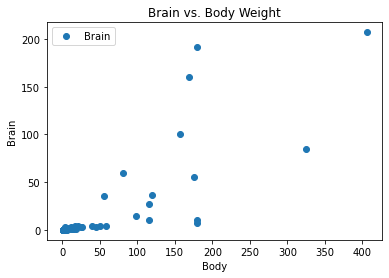

In [8]:
df1.plot(y='Brain', x='Body', style ="o")
plt.ylabel('Brain')
plt.xlabel('Body')
plt.title('Brain vs. Body Weight')
plt.show()

In [9]:
df1.corr()

,Brain,Body
Brain,1.000000,0.799676
Body,0.799676,1.000000


### Preparing data for the model

In [10]:
X = df1[['Body']].values  #Feature variable
y = df1['Brain'].values     #Target variable

In [11]:
#Split the data into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [12]:
X_train.shape, X_test.shape

((39, 1), (14, 1))

In [13]:
y_train.shape,y_test.shape

((39,), (14,))

### Model

In [14]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # Predicted Brain weight = m * Body weight + c  
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

### 1. Find the linear regression equation for this data.

y = mX+c

In [15]:
c = regressor.intercept_ # c value
print(c)

-1.9858988192458469


In [16]:
m = regressor.coef_ # m value
print(m)

[0.39689617]


In [17]:
print('Linear Regression Equation: y = {:.3f} * x + {:.3f}'.format(m[0], c))

Linear Regression Equation: y = 0.397 * x + -1.986


### 2. Chart the original data and the equation on the chart.

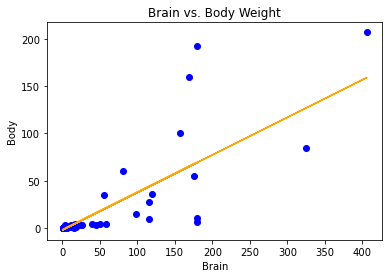

In [18]:
plt.ylabel('Body')
plt.xlabel('Brain')
plt.title('Brain vs. Body Weight')

plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='orange')
plt.show()

### 3. Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [19]:
y_predict = regressor.predict(X_test)  # given the features of the test dataset, it will give the final predictions
df_prediction = pd.DataFrame({'Actual':y_test,'Predicted': y_predict})
df_prediction

,Actual,Predicted
0,3.300,8.174643
1,36.330,45.443193
2,0.048,-1.854923
3,0.023,-1.866830
4,0.023,-1.827140
5,55.500,67.470931
6,60.000,30.162691
7,3.500,-0.438004
8,0.200,-0.001418
9,0.550,-1.033348


In [20]:
from sklearn.metrics import r2_score as r
r(y_test,y_predict)

0.9084780665210614

R² Score is 0.90 which is higher than 0.8. Therefore the equation is good fit for this model.

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [2]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
print(df.shape)
df.head()

(52, 6)


,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [5]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)

((df < (lower_limit)) | (df > (upper_limit))).sum()

Sex       0
Rank      0
Year      1
Degree    0
YSdeg     0
Salary    0
dtype: int64

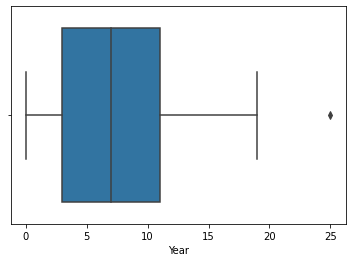

In [7]:
sns.boxplot(x = df["Year"])
plt.show()

Eventhough an outlier is present in the feature "Year" we can neglect it as it does not affect the overall data.

In [8]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


### Preparing data for the model

In [9]:
X =df[['Sex','Rank','Year','Degree','YSdeg']].values  #Feature variable
y = df['Salary'].values                               #Target variable

#Split the data into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)

In [10]:
X_train.shape, X_test.shape


((36, 5), (16, 5))

In [11]:
y_train.shape,y_test.shape

((36,), (16,))

### Model

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train, y_train) #Learning happens - GD is done

LinearRegression()

### 1. Find the linear regression equation for this data using columns 1-5 to column 6.

In [13]:
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
print('Features & Coefficients')
print(list(zip(feature, regressor.coef_)))

Features & Coefficients
[('Sex', 2331.798252904536), ('Rank', 5714.160813518992), ('Year', 534.5761161341666), ('Degree', -837.1074955791794), ('YSdeg', -142.67849286718422)]


In [14]:
print('Linear Regression Equation is : y = {:.3f} + {:.3f} x1 + {:.3f} x2 + {:.3f} x3 + {:.3f} x4 + {:.3f} x5 '.format(regressor.intercept_ , regressor.coef_[0],regressor.coef_[1],regressor.coef_[2],regressor.coef_[3],regressor.coef_[4]))

Linear Regression Equation is : y = 10429.427 + 2331.798 x1 + 5714.161 x2 + 534.576 x3 + -837.107 x4 + -142.678 x5 


### 2. Find the selection of columns with the best 𝑅² score.

In [15]:
def r2_score(feature, df, sal='Salary'):
    in_put = df[feature]
    out_put = df[sal]
    lr = linear_model.LinearRegression()
    lr.fit(in_put,out_put)
    return lr.score(in_put,out_put)
print('R^2 score for equation using all columns: {}'.format(r2_score(feature,df)))

R^2 score for equation using all columns: 0.8547180674410969


In [16]:
import itertools as it 

#itertools.combinations() module is used to print all possible combinations
def get_combo(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

combos = get_combo(feature)

In [17]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[r2_score(list(n), df, focus)] = n
    return combo_scores

In [18]:
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335425, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485598, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264598, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153612, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907434, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533505, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

- R² score is arranged is descending order
- R² score is highest when all the feature are included = 0.8547 
- Rank and Year feature together gives R² score = 0.8436 which is very high. Therefore we can conclude these two features having very high importance 

### 3. Report whether sex is a factor in salary.

- Sex feature on its own has a very low R² score = 0.063898. This means that it has no direct influence on salary.